# Curso de Numpy - Alura - Desafio

## Bibliotecas Importadas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Carregando e Preparando Dados

In [2]:
#skiprows, para definir a partir de qual linha começa, usecols para definir o intervalo de colunas
data = np.loadtxt('citrus.csv', delimiter=',', skiprows=1, usecols=np.arange(1,6,1))
data

array([[  2.96,  86.76, 172.  ,  85.  ,   2.  ],
       [  3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  4.42,  95.17, 156.  ,  81.  ,   2.  ],
       ...,
       [ 15.59, 256.5 , 168.  ,  82.  ,  20.  ],
       [ 15.92, 260.14, 142.  ,  72.  ,  11.  ],
       [ 16.45, 261.51, 152.  ,  74.  ,   2.  ]])

Análise dos dados

In [3]:
print(data.shape,"/", data.ndim, "/", data.size)

(10000, 5) / 2 / 50000


Verificando se há presença de Not a Number

In [4]:
np.isnan(data).any()

False

In [16]:
#Utilizando slicing para obter os respectivos valores para cada array
diametro_laranja = data[0:5000,0] 
peso_laranja = data[0:5000,1]
diametro_toranja = data[5000:, 0]
peso_toranja = data[5000:, 1]

## Visualização dos Dados

Análise gráfica de Laranja e Toranja do peso pelo diâmetro.

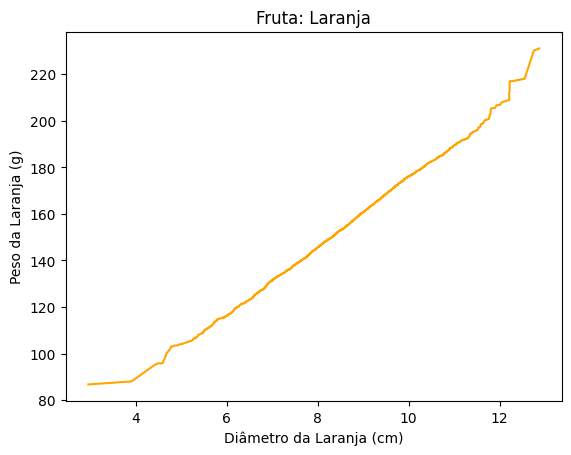

In [6]:
plt.plot(diametro_laranja,peso_laranja, "Orange")
plt.title("Fruta: Laranja")
plt.xlabel("Diâmetro da Laranja (cm)")
plt.ylabel("Peso da Laranja (g)")
plt.show()

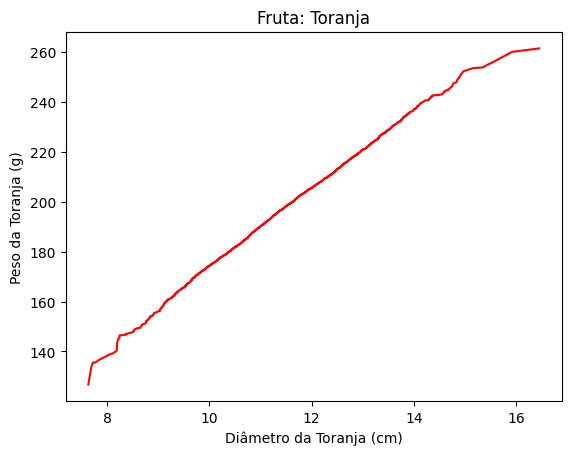

In [7]:
plt.plot(diametro_toranja,peso_toranja, "Red")
plt.title("Fruta: Toranja")
plt.xlabel("Diâmetro da Toranja (cm)")
plt.ylabel("Peso da Toranja (g)")
plt.show()

## Regressão Linear

##### A regressão linear é um método estatístico utilizado para modelar a relação entre uma variável dependente entre <br>
##### uma ou mais variáveis independentes. Isto é, o método tem como objetivo encontrar uma reta ajustada que melhor <br>
##### se encaixe aos dados observados. A equação da reta é representada por: <br>
$$ Y = aX + b$$
Onde:<br>
$Y$ = Variável dependente;<br>
$X$ = Variável independente;<br>
$a$ = Inclinação da reta;<br>
$b$ = Interceptação no eixo Y;<br>

#### Cálculo do Coeficiente Angular da Reta para os dados das Laranjas (a1): <br>
$$ \hat{a1} = \frac{N1\cdot\sum_{}^{}\left( X1_{i}\cdot Y1_{i} \right) - \sum_{_{}}^{}\left( X1_{i} \right) \cdot \sum_{_{}}^{}\left( Y1_{i} \right)} {N1\cdot \sum_{_{}}^{}\left( X1^{2}_{i} \right)-\left( \sum_{_{}}^{}\left( X1_{i} \right) \right)^{2}} $$
Onde:<br>
$\hat{a1}$ = Coeficiente angular da reta;<br>
$N1$ = Número de elementos; <br>
$X1$ = Valores do eixo das abcissas;<br>
$Y1$ = Valores do eixo das ordenadas.<br>

Cálculo:

In [8]:
X1 = diametro_laranja
Y1 = peso_laranja
N1 = np.size(X1)
a1 = (N1 * np.sum(X1*Y1) - np.sum(X1)*np.sum(Y1)) / (N1 * np.sum(X1**2) - np.sum(X1)**2)
a1

14.7997452319846

#### Cálculo do Coeficiente Linear da Reta das Laranjas (b1): <br>
$$ \hat{b1} = \bar{Y1_{i}} - \hat{a1}\cdot \bar{X1_{i}} $$
Onde:<br>
$\hat{b1}$ = Coeficiente linear da reta;<br>
$\hat{a1}$ = Coeficiente angular da reta;<br>
$\bar{X1_{i}}$ = Média aritimética dos valores de X;<br>
$\bar{Y1_{i}}$ = Média aritimética dos valores de Y.

Cálculo:

In [9]:
media_X1 = np.mean(X1)
media_Y1 = np.mean(Y1)
b1 = media_Y1 - a1* media_X1
b1

27.38560381218413

Com os coeficientes da reta em mãos, obteve-se a seguinte equação da reta:

In [10]:
y1 = a1*X1 + b1
print(f"Y = {a1:.4f}*X + {b1:.4f}")

Y = 14.7997*X + 27.3856


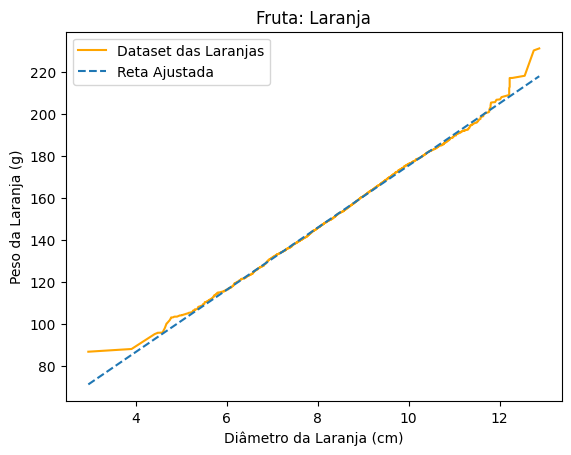

In [11]:
plt.plot(diametro_laranja,peso_laranja, "Orange", label = "Dataset das Laranjas" )
plt.plot(X1, y1, label = "Reta Ajustada", linestyle = '--')
plt.title("Fruta: Laranja")
plt.xlabel("Diâmetro da Laranja (cm)")
plt.ylabel("Peso da Laranja (g)")
plt.legend()
plt.show()

#### Cálculo do Coeficiente Angular da Reta para os dados das Toranjas (a2): <br>
$$ \hat{a2} = \frac{N2\cdot\sum_{}^{}\left( X2_{i}\cdot Y2_{i} \right) - \sum_{_{}}^{}\left( X2_{i} \right) \cdot \sum_{_{}}^{}\left(Y2_{i} \right)} {N2\cdot \sum_{_{}}^{}\left( X2^{2}_{i} \right)-\left( \sum_{_{}}^{}\left( X2_{i} \right) \right)^{2}} $$
Onde:<br>
$\hat{a2}$ = Coeficiente angular da reta;<br>
$N2$ = Número de elementos; <br>
$X2$ = Valores do eixo das abcissas;<br>
$Y2$ = Valores do eixo das ordenadas.<br>

Cálculo:

In [12]:
X2 = diametro_toranja
Y2 = peso_toranja
N2 = np.size(X2)
a2 = (N2 * np.sum(X2*Y2) - np.sum(X2)*np.sum(Y2)) / (N2 * np.sum(X2**2) - np.sum(X2)**2)
a2

15.70884459360376

#### Cálculo do Coeficiente Linear da Reta das Toranjas (b2): <br>
$$ \hat{b2} = \bar{Y2_{i}} - \hat{a2}\cdot \bar{X2_{i}} $$
Onde:<br>
$\hat{b2}$ = Coeficiente linear da reta;<br>
$\hat{a2}$ = Coeficiente angular da reta;<br>
$\bar{X2_{i}}$ = Média aritimética dos valores de X;<br>
$\bar{Y2_{i}}$ = Média aritimética dos valores de Y.

Cálculo:

In [13]:
media_X2 = np.mean(X2)
media_Y2 = np.mean(Y2)
b2 = media_Y2 - a2 * media_X2
b2

17.007102876817726

Com os coeficientes da reta em mãos, obteve-se a seguinte equação da reta:

In [14]:
y2 = a2*X2 + b2
print(f"Y = {a2:.4f}*X + {b2:.4f}")

Y = 15.7088*X + 17.0071


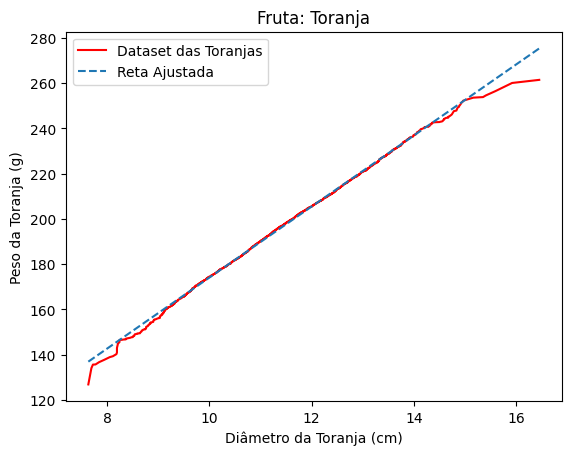

In [15]:
plt.plot(diametro_toranja,peso_toranja, "Red", label = "Dataset das Toranjas")
plt.plot(X2, y2, label = "Reta Ajustada", linestyle = '--')
plt.title("Fruta: Toranja")
plt.xlabel("Diâmetro da Toranja (cm)")
plt.ylabel("Peso da Toranja (g)")
plt.legend()
plt.show()

### Números Aleatórios

Outra forma de obter os valores dos coeficientes se dá pela geração de números aleatórios, é isso que farei a seguir.
Em resumo, irei gerar um array de n números hipotéticos para possíveis valores de coeficientes angulares e aplicarei
a função para encontrar a norma de cada um deles, para o melhor resultado assumo que este será meu coeficiente angular.

In [80]:
norma2 = np.array([])
np.random.seed(84)
coef_angulares = np.random.uniform(low=0.0,high=30.0,size=100)

for i in range(100):
  norma2 = np.append(norma2,np.linalg.norm(Y2- (coef_angulares[i]*X2+b2)))

In [82]:
norma2

array([11693.17413134,  3755.7139559 ,  6887.64440213,  2567.54620994,
       11421.27875572,  9623.16975444,  8570.35712878,  6496.01737355,
        2576.78335647,  9612.62122283,  5709.22942283,   694.86124391,
       10855.56971926,  5539.32448104,  3138.48231382,   296.80153318,
        8897.43610923,  8348.32032632, 10207.45613151, 10229.25483217,
        2194.04796582,  8447.90009229, 11004.30515345, 11563.83828119,
        4097.68812039,  7733.20784322,  2802.34672698,  7688.10838526,
       11135.23528967,  9431.62836349,   725.96495192,  6289.86199437,
        5189.17243235,  4716.49667303,  9249.97199743,  7274.99619046,
        8875.70669341,   620.66933013,  4715.68604821,  8050.01059473,
        9237.81284881,  3993.48369245, 11531.67584557,  5848.61198164,
        1043.07200636,  9874.87158132, 11758.74209865,  8955.65672563,
        2219.00875303,  3584.999068  , 11347.09074091,  2478.37746847,
         878.42012453,  2740.38089117,  1765.67246582,   710.96921152,
      

In [83]:
np.min(norma2)

104.85705134029287

In [84]:
coef_angulares[norma2 == np.min(norma2)]

array([15.82512199])